***
    
Demo EvoJAX for PINN (Physics-Informed Neural Network)
    
***

    Version: 2023-03-16
    
    Author : Nicholas Sung Wei Yong, Wong Jian Cheng, Ooi Chin Chun, Abhishek Gupta

    Contain:
    
    1. PINN for solving Linearized Burgers equation 
    
    2. Optimize PINN using CMA-ES solver in the EvoJAX framework
       -  as described in Nicholas Sung Wei Yong, Jian Cheng Wong, Pao-Hsiung Chiu, Abhishek Gupta, Chinchun Ooi, Yew-Soon Ong
       "Neuroevolution Surpasses Stochastic Gradient Descent for Physics-Informed Neural Networks" arXiv preprint arXiv:2212.07624 (2022).

# Demo

In [1]:
# choose GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# import library
import numpy as np
import time

# import problem
from linear import get_fitness, policy # Number of parameters: 260

CMA Solver

In [2]:
from evojax.algo import CMA_ES_JAX

seed = 1
solver = CMA_ES_JAX(
         pop_size=50, init_stdev=0.01,
         param_size=policy.num_params, seed=seed)

Training

In [3]:
max_iters = 100000
num_tests = 1

loss_ls = []
t_training = []

runtime = 0
train_iters = 0
while (train_iters < max_iters) and (runtime < 60):
    start = time.time()
    # Training.
    params = solver.ask()
    scores = get_fitness(params)
    # Updates the weights through the solver
    solver.tell(fitness=scores)
    # This is the average loss of all the population of parameters
    score_avg_loss = np.mean(np.array(scores, copy=False, subok=True))
    best_params = solver.best_params
    end = time.time()
    t_training.append(end-start)
    loss_ls.append(-1*score_avg_loss)
    # update
    runtime += (end-start)
    train_iters += 1
    # print out
    print ('time = %.2fs  loss = %.2e'%(runtime, loss_ls[-1]))

time = 3.12s  loss = 1.04e+01
time = 3.73s  loss = 1.04e+01
time = 3.75s  loss = 1.04e+01
time = 3.77s  loss = 1.04e+01
time = 3.78s  loss = 1.04e+01
time = 3.80s  loss = 1.04e+01
time = 3.81s  loss = 1.04e+01
time = 3.83s  loss = 1.04e+01
time = 3.85s  loss = 1.04e+01
time = 3.86s  loss = 1.04e+01
time = 3.88s  loss = 1.04e+01
time = 3.90s  loss = 1.04e+01
time = 3.91s  loss = 1.04e+01
time = 3.93s  loss = 1.04e+01
time = 3.94s  loss = 1.04e+01
time = 3.96s  loss = 1.04e+01
time = 3.98s  loss = 1.03e+01
time = 3.99s  loss = 1.03e+01
time = 4.01s  loss = 1.03e+01
time = 4.02s  loss = 1.03e+01
time = 4.03s  loss = 1.03e+01
time = 4.05s  loss = 1.03e+01
time = 4.06s  loss = 1.03e+01
time = 4.08s  loss = 1.03e+01
time = 4.09s  loss = 1.03e+01
time = 4.11s  loss = 1.03e+01
time = 4.12s  loss = 1.03e+01
time = 4.14s  loss = 1.02e+01
time = 4.15s  loss = 1.02e+01
time = 4.17s  loss = 1.02e+01
time = 4.18s  loss = 1.02e+01
time = 4.20s  loss = 1.02e+01
time = 4.21s  loss = 1.02e+01
time = 4.2

time = 7.86s  loss = 3.35e+00
time = 7.87s  loss = 3.47e+00
time = 7.89s  loss = 2.89e+00
time = 7.90s  loss = 3.58e+00
time = 7.92s  loss = 3.46e+00
time = 7.93s  loss = 3.13e+00
time = 7.95s  loss = 3.37e+00
time = 7.96s  loss = 3.57e+00
time = 7.98s  loss = 2.99e+00
time = 7.99s  loss = 3.26e+00
time = 8.00s  loss = 2.93e+00
time = 8.02s  loss = 3.35e+00
time = 8.03s  loss = 3.33e+00
time = 8.05s  loss = 2.67e+00
time = 8.07s  loss = 3.26e+00
time = 8.08s  loss = 3.02e+00
time = 8.10s  loss = 3.39e+00
time = 8.11s  loss = 3.33e+00
time = 8.13s  loss = 2.91e+00
time = 8.14s  loss = 2.80e+00
time = 8.16s  loss = 2.99e+00
time = 8.17s  loss = 3.26e+00
time = 8.18s  loss = 3.19e+00
time = 8.20s  loss = 2.96e+00
time = 8.21s  loss = 2.87e+00
time = 8.23s  loss = 2.87e+00
time = 8.24s  loss = 3.35e+00
time = 8.26s  loss = 3.01e+00
time = 8.27s  loss = 2.88e+00
time = 8.29s  loss = 3.00e+00
time = 8.30s  loss = 2.89e+00
time = 8.32s  loss = 2.85e+00
time = 8.33s  loss = 2.67e+00
time = 8.3

time = 11.96s  loss = 1.12e+00
time = 11.97s  loss = 1.21e+00
time = 11.99s  loss = 1.18e+00
time = 12.00s  loss = 1.25e+00
time = 12.02s  loss = 1.18e+00
time = 12.03s  loss = 1.10e+00
time = 12.04s  loss = 1.22e+00
time = 12.06s  loss = 1.22e+00
time = 12.07s  loss = 9.78e-01
time = 12.09s  loss = 1.04e+00
time = 12.10s  loss = 1.28e+00
time = 12.12s  loss = 1.04e+00
time = 12.13s  loss = 1.00e+00
time = 12.15s  loss = 1.10e+00
time = 12.16s  loss = 1.19e+00
time = 12.18s  loss = 1.10e+00
time = 12.19s  loss = 8.97e-01
time = 12.21s  loss = 9.46e-01
time = 12.22s  loss = 1.07e+00
time = 12.24s  loss = 9.52e-01
time = 12.25s  loss = 9.56e-01
time = 12.27s  loss = 9.02e-01
time = 12.28s  loss = 9.57e-01
time = 12.30s  loss = 9.61e-01
time = 12.31s  loss = 9.70e-01
time = 12.33s  loss = 8.74e-01
time = 12.34s  loss = 9.91e-01
time = 12.36s  loss = 9.27e-01
time = 12.37s  loss = 9.65e-01
time = 12.39s  loss = 9.11e-01
time = 12.40s  loss = 9.87e-01
time = 12.41s  loss = 9.62e-01
time = 1

time = 15.84s  loss = 3.29e-01
time = 15.86s  loss = 3.44e-01
time = 15.87s  loss = 3.19e-01
time = 15.88s  loss = 3.48e-01
time = 15.90s  loss = 3.70e-01
time = 15.91s  loss = 3.26e-01
time = 15.93s  loss = 3.34e-01
time = 15.94s  loss = 3.19e-01
time = 15.96s  loss = 3.26e-01
time = 15.97s  loss = 3.65e-01
time = 15.99s  loss = 3.26e-01
time = 16.00s  loss = 3.74e-01
time = 16.02s  loss = 3.58e-01
time = 16.03s  loss = 3.69e-01
time = 16.04s  loss = 3.20e-01
time = 16.06s  loss = 3.34e-01
time = 16.07s  loss = 3.41e-01
time = 16.09s  loss = 3.39e-01
time = 16.10s  loss = 3.17e-01
time = 16.12s  loss = 3.28e-01
time = 16.13s  loss = 3.39e-01
time = 16.15s  loss = 3.42e-01
time = 16.16s  loss = 3.38e-01
time = 16.18s  loss = 3.76e-01
time = 16.19s  loss = 3.35e-01
time = 16.20s  loss = 3.37e-01
time = 16.22s  loss = 3.59e-01
time = 16.23s  loss = 3.42e-01
time = 16.25s  loss = 3.20e-01
time = 16.26s  loss = 3.05e-01
time = 16.28s  loss = 3.45e-01
time = 16.29s  loss = 3.74e-01
time = 1

time = 19.73s  loss = 2.19e-01
time = 19.75s  loss = 2.23e-01
time = 19.76s  loss = 2.11e-01
time = 19.78s  loss = 2.10e-01
time = 19.79s  loss = 2.18e-01
time = 19.81s  loss = 2.10e-01
time = 19.82s  loss = 1.96e-01
time = 19.83s  loss = 2.00e-01
time = 19.85s  loss = 2.02e-01
time = 19.86s  loss = 2.11e-01
time = 19.88s  loss = 2.10e-01
time = 19.89s  loss = 2.20e-01
time = 19.91s  loss = 2.01e-01
time = 19.92s  loss = 2.17e-01
time = 19.94s  loss = 2.05e-01
time = 19.95s  loss = 2.13e-01
time = 19.97s  loss = 2.11e-01
time = 19.98s  loss = 2.18e-01
time = 20.00s  loss = 2.01e-01
time = 20.01s  loss = 2.06e-01
time = 20.03s  loss = 2.04e-01
time = 20.04s  loss = 1.97e-01
time = 20.05s  loss = 2.20e-01
time = 20.07s  loss = 2.05e-01
time = 20.08s  loss = 2.00e-01
time = 20.10s  loss = 2.06e-01
time = 20.11s  loss = 1.97e-01
time = 20.13s  loss = 2.12e-01
time = 20.14s  loss = 1.94e-01
time = 20.16s  loss = 2.03e-01
time = 20.17s  loss = 1.94e-01
time = 20.19s  loss = 1.91e-01
time = 2

time = 23.63s  loss = 1.56e-01
time = 23.65s  loss = 1.57e-01
time = 23.66s  loss = 1.55e-01
time = 23.68s  loss = 1.47e-01
time = 23.69s  loss = 1.55e-01
time = 23.71s  loss = 1.58e-01
time = 23.72s  loss = 1.53e-01
time = 23.74s  loss = 1.48e-01
time = 23.75s  loss = 1.52e-01
time = 23.77s  loss = 1.53e-01
time = 23.78s  loss = 1.48e-01
time = 23.80s  loss = 1.50e-01
time = 23.81s  loss = 1.61e-01
time = 23.83s  loss = 1.46e-01
time = 23.84s  loss = 1.49e-01
time = 23.85s  loss = 1.50e-01
time = 23.87s  loss = 1.47e-01
time = 23.88s  loss = 1.45e-01
time = 23.90s  loss = 1.48e-01
time = 23.91s  loss = 1.45e-01
time = 23.93s  loss = 1.49e-01
time = 23.94s  loss = 1.47e-01
time = 23.96s  loss = 1.51e-01
time = 23.97s  loss = 1.46e-01
time = 23.99s  loss = 1.47e-01
time = 24.00s  loss = 1.50e-01
time = 24.02s  loss = 1.55e-01
time = 24.03s  loss = 1.43e-01
time = 24.04s  loss = 1.38e-01
time = 24.06s  loss = 1.41e-01
time = 24.07s  loss = 1.48e-01
time = 24.09s  loss = 1.63e-01
time = 2

time = 27.53s  loss = 7.95e-02
time = 27.55s  loss = 7.59e-02
time = 27.56s  loss = 7.53e-02
time = 27.58s  loss = 7.44e-02
time = 27.59s  loss = 7.71e-02
time = 27.61s  loss = 7.96e-02
time = 27.62s  loss = 7.90e-02
time = 27.64s  loss = 8.32e-02
time = 27.65s  loss = 7.42e-02
time = 27.67s  loss = 7.33e-02
time = 27.68s  loss = 7.58e-02
time = 27.70s  loss = 8.11e-02
time = 27.71s  loss = 7.64e-02
time = 27.73s  loss = 7.23e-02
time = 27.74s  loss = 7.23e-02
time = 27.76s  loss = 7.06e-02
time = 27.77s  loss = 7.01e-02
time = 27.79s  loss = 7.10e-02
time = 27.80s  loss = 7.60e-02
time = 27.81s  loss = 7.35e-02
time = 27.83s  loss = 7.27e-02
time = 27.84s  loss = 6.95e-02
time = 27.86s  loss = 7.20e-02
time = 27.87s  loss = 6.95e-02
time = 27.89s  loss = 6.80e-02
time = 27.90s  loss = 6.74e-02
time = 27.92s  loss = 7.04e-02
time = 27.93s  loss = 7.45e-02
time = 27.95s  loss = 6.05e-02
time = 27.96s  loss = 6.31e-02
time = 27.98s  loss = 7.37e-02
time = 27.99s  loss = 7.31e-02
time = 2

time = 31.44s  loss = 3.35e-02
time = 31.45s  loss = 3.05e-02
time = 31.47s  loss = 3.54e-02
time = 31.48s  loss = 3.45e-02
time = 31.50s  loss = 3.44e-02
time = 31.51s  loss = 3.16e-02
time = 31.53s  loss = 3.27e-02
time = 31.54s  loss = 3.40e-02
time = 31.55s  loss = 3.35e-02
time = 31.57s  loss = 3.04e-02
time = 31.58s  loss = 3.13e-02
time = 31.60s  loss = 3.03e-02
time = 31.61s  loss = 3.11e-02
time = 31.63s  loss = 2.79e-02
time = 31.64s  loss = 3.18e-02
time = 31.66s  loss = 2.78e-02
time = 31.67s  loss = 2.68e-02
time = 31.69s  loss = 3.24e-02
time = 31.70s  loss = 3.10e-02
time = 31.72s  loss = 3.02e-02
time = 31.73s  loss = 3.01e-02
time = 31.75s  loss = 2.91e-02
time = 31.76s  loss = 2.65e-02
time = 31.78s  loss = 2.51e-02
time = 31.79s  loss = 2.75e-02
time = 31.80s  loss = 2.59e-02
time = 31.82s  loss = 2.75e-02
time = 31.83s  loss = 2.76e-02
time = 31.85s  loss = 2.85e-02
time = 31.86s  loss = 2.91e-02
time = 31.88s  loss = 2.85e-02
time = 31.89s  loss = 2.82e-02
time = 3

time = 35.36s  loss = 1.60e-02
time = 35.37s  loss = 1.60e-02
time = 35.39s  loss = 1.51e-02
time = 35.40s  loss = 1.58e-02
time = 35.42s  loss = 1.49e-02
time = 35.43s  loss = 1.40e-02
time = 35.45s  loss = 1.47e-02
time = 35.46s  loss = 1.31e-02
time = 35.48s  loss = 1.44e-02
time = 35.49s  loss = 1.59e-02
time = 35.51s  loss = 1.39e-02
time = 35.52s  loss = 1.35e-02
time = 35.54s  loss = 1.49e-02
time = 35.55s  loss = 1.48e-02
time = 35.56s  loss = 1.45e-02
time = 35.58s  loss = 1.52e-02
time = 35.59s  loss = 1.53e-02
time = 35.61s  loss = 1.45e-02
time = 35.62s  loss = 1.54e-02
time = 35.64s  loss = 1.46e-02
time = 35.65s  loss = 1.44e-02
time = 35.67s  loss = 1.47e-02
time = 35.68s  loss = 1.44e-02
time = 35.70s  loss = 1.44e-02
time = 35.71s  loss = 1.32e-02
time = 35.73s  loss = 1.47e-02
time = 35.74s  loss = 1.46e-02
time = 35.76s  loss = 1.32e-02
time = 35.77s  loss = 1.41e-02
time = 35.79s  loss = 1.46e-02
time = 35.80s  loss = 1.28e-02
time = 35.81s  loss = 1.26e-02
time = 3

time = 39.28s  loss = 7.84e-03
time = 39.29s  loss = 8.24e-03
time = 39.31s  loss = 8.01e-03
time = 39.32s  loss = 7.74e-03
time = 39.34s  loss = 8.09e-03
time = 39.35s  loss = 8.02e-03
time = 39.37s  loss = 8.36e-03
time = 39.38s  loss = 7.70e-03
time = 39.39s  loss = 7.91e-03
time = 39.41s  loss = 7.42e-03
time = 39.42s  loss = 7.93e-03
time = 39.44s  loss = 8.31e-03
time = 39.45s  loss = 7.62e-03
time = 39.47s  loss = 8.05e-03
time = 39.48s  loss = 7.75e-03
time = 39.50s  loss = 7.42e-03
time = 39.51s  loss = 8.27e-03
time = 39.53s  loss = 8.18e-03
time = 39.54s  loss = 7.62e-03
time = 39.56s  loss = 8.01e-03
time = 39.57s  loss = 7.71e-03
time = 39.59s  loss = 7.21e-03
time = 39.60s  loss = 7.02e-03
time = 39.62s  loss = 7.94e-03
time = 39.63s  loss = 7.19e-03
time = 39.64s  loss = 7.51e-03
time = 39.66s  loss = 7.34e-03
time = 39.67s  loss = 7.60e-03
time = 39.69s  loss = 7.23e-03
time = 39.70s  loss = 7.37e-03
time = 39.72s  loss = 7.54e-03
time = 39.73s  loss = 7.69e-03
time = 3

time = 43.20s  loss = 7.69e-03
time = 43.22s  loss = 7.30e-03
time = 43.23s  loss = 7.52e-03
time = 43.25s  loss = 7.07e-03
time = 43.26s  loss = 7.52e-03
time = 43.28s  loss = 7.06e-03
time = 43.29s  loss = 7.58e-03
time = 43.31s  loss = 7.25e-03
time = 43.32s  loss = 7.29e-03
time = 43.34s  loss = 6.81e-03
time = 43.35s  loss = 6.71e-03
time = 43.37s  loss = 7.25e-03
time = 43.38s  loss = 6.85e-03
time = 43.40s  loss = 6.46e-03
time = 43.41s  loss = 6.74e-03
time = 43.43s  loss = 5.91e-03
time = 43.44s  loss = 6.60e-03
time = 43.46s  loss = 6.75e-03
time = 43.47s  loss = 6.90e-03
time = 43.49s  loss = 6.46e-03
time = 43.50s  loss = 7.09e-03
time = 43.51s  loss = 6.56e-03
time = 43.53s  loss = 6.64e-03
time = 43.54s  loss = 6.86e-03
time = 43.56s  loss = 6.04e-03
time = 43.57s  loss = 6.57e-03
time = 43.59s  loss = 6.61e-03
time = 43.60s  loss = 6.28e-03
time = 43.62s  loss = 6.29e-03
time = 43.63s  loss = 6.17e-03
time = 43.65s  loss = 6.41e-03
time = 43.66s  loss = 6.31e-03
time = 4

time = 47.14s  loss = 3.46e-03
time = 47.16s  loss = 3.18e-03
time = 47.17s  loss = 3.25e-03
time = 47.19s  loss = 3.18e-03
time = 47.20s  loss = 3.18e-03
time = 47.22s  loss = 3.19e-03
time = 47.23s  loss = 3.28e-03
time = 47.25s  loss = 3.13e-03
time = 47.26s  loss = 3.19e-03
time = 47.28s  loss = 3.13e-03
time = 47.29s  loss = 3.14e-03
time = 47.30s  loss = 2.98e-03
time = 47.32s  loss = 3.17e-03
time = 47.33s  loss = 3.14e-03
time = 47.35s  loss = 3.05e-03
time = 47.36s  loss = 3.11e-03
time = 47.38s  loss = 2.91e-03
time = 47.39s  loss = 2.94e-03
time = 47.41s  loss = 3.02e-03
time = 47.42s  loss = 3.03e-03
time = 47.44s  loss = 2.82e-03
time = 47.45s  loss = 2.83e-03
time = 47.47s  loss = 2.84e-03
time = 47.48s  loss = 2.89e-03
time = 47.50s  loss = 2.88e-03
time = 47.51s  loss = 2.87e-03
time = 47.53s  loss = 2.93e-03
time = 47.54s  loss = 2.89e-03
time = 47.55s  loss = 2.79e-03
time = 47.57s  loss = 2.86e-03
time = 47.58s  loss = 2.74e-03
time = 47.60s  loss = 2.80e-03
time = 4

time = 51.09s  loss = 1.80e-03
time = 51.11s  loss = 1.75e-03
time = 51.12s  loss = 1.76e-03
time = 51.13s  loss = 1.75e-03
time = 51.15s  loss = 1.77e-03
time = 51.16s  loss = 1.78e-03
time = 51.18s  loss = 1.80e-03
time = 51.19s  loss = 1.76e-03
time = 51.21s  loss = 1.79e-03
time = 51.22s  loss = 1.76e-03
time = 51.24s  loss = 1.74e-03
time = 51.25s  loss = 1.75e-03
time = 51.27s  loss = 1.71e-03
time = 51.28s  loss = 1.73e-03
time = 51.30s  loss = 1.74e-03
time = 51.31s  loss = 1.75e-03
time = 51.33s  loss = 1.74e-03
time = 51.34s  loss = 1.72e-03
time = 51.36s  loss = 1.77e-03
time = 51.37s  loss = 1.74e-03
time = 51.39s  loss = 1.75e-03
time = 51.40s  loss = 1.71e-03
time = 51.42s  loss = 1.75e-03
time = 51.43s  loss = 1.74e-03
time = 51.44s  loss = 1.76e-03
time = 51.46s  loss = 1.74e-03
time = 51.47s  loss = 1.80e-03
time = 51.49s  loss = 1.79e-03
time = 51.50s  loss = 1.72e-03
time = 51.52s  loss = 1.78e-03
time = 51.53s  loss = 1.73e-03
time = 51.55s  loss = 1.72e-03
time = 5

time = 55.03s  loss = 1.30e-03
time = 55.04s  loss = 1.31e-03
time = 55.06s  loss = 1.31e-03
time = 55.07s  loss = 1.31e-03
time = 55.09s  loss = 1.30e-03
time = 55.10s  loss = 1.32e-03
time = 55.12s  loss = 1.30e-03
time = 55.13s  loss = 1.30e-03
time = 55.15s  loss = 1.33e-03
time = 55.16s  loss = 1.28e-03
time = 55.18s  loss = 1.33e-03
time = 55.19s  loss = 1.29e-03
time = 55.21s  loss = 1.29e-03
time = 55.22s  loss = 1.31e-03
time = 55.24s  loss = 1.29e-03
time = 55.25s  loss = 1.29e-03
time = 55.27s  loss = 1.30e-03
time = 55.28s  loss = 1.27e-03
time = 55.30s  loss = 1.29e-03
time = 55.31s  loss = 1.27e-03
time = 55.33s  loss = 1.29e-03
time = 55.34s  loss = 1.28e-03
time = 55.35s  loss = 1.27e-03
time = 55.37s  loss = 1.26e-03
time = 55.38s  loss = 1.28e-03
time = 55.40s  loss = 1.28e-03
time = 55.42s  loss = 1.27e-03
time = 55.43s  loss = 1.27e-03
time = 55.45s  loss = 1.26e-03
time = 55.46s  loss = 1.25e-03
time = 55.47s  loss = 1.27e-03
time = 55.49s  loss = 1.27e-03
time = 5

time = 58.99s  loss = 1.03e-03
time = 59.00s  loss = 1.02e-03
time = 59.02s  loss = 1.03e-03
time = 59.03s  loss = 1.03e-03
time = 59.05s  loss = 1.02e-03
time = 59.06s  loss = 1.02e-03
time = 59.08s  loss = 1.02e-03
time = 59.09s  loss = 1.02e-03
time = 59.10s  loss = 1.02e-03
time = 59.12s  loss = 1.02e-03
time = 59.13s  loss = 1.02e-03
time = 59.15s  loss = 1.01e-03
time = 59.16s  loss = 1.01e-03
time = 59.18s  loss = 1.02e-03
time = 59.19s  loss = 1.01e-03
time = 59.21s  loss = 1.01e-03
time = 59.22s  loss = 1.02e-03
time = 59.24s  loss = 1.01e-03
time = 59.25s  loss = 1.01e-03
time = 59.27s  loss = 1.01e-03
time = 59.28s  loss = 1.01e-03
time = 59.30s  loss = 1.01e-03
time = 59.31s  loss = 1.01e-03
time = 59.33s  loss = 1.01e-03
time = 59.34s  loss = 1.01e-03
time = 59.36s  loss = 1.01e-03
time = 59.37s  loss = 1.02e-03
time = 59.39s  loss = 1.00e-03
time = 59.40s  loss = 1.00e-03
time = 59.42s  loss = 1.01e-03
time = 59.43s  loss = 1.00e-03
time = 59.44s  loss = 1.00e-03
time = 5

In [4]:
train_iters, loss_ls[-1], min(loss_ls)

(3822, 0.0009731829632073641, 0.0009727625292725861)

In [5]:
# import pandas as pd
# training_ls = np.cumsum(t_training)
# df = pd.DataFrame({'Training Time': training_ls, 'Loss': loss_ls})
# df.to_csv('linear_cma_%d.csv'%(seed), index=False)

Visualize optimzied PINN

In [6]:
from linear import PINNs
from flax.core.frozen_dict import unfreeze, freeze
from jax import random, numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
this_dict = policy._format_params_fn(jnp.array([best_params]))
new_dict = unfreeze(this_dict)
for key1, value1 in new_dict.items():
    for key2, value2 in value1.items():
        for key3, value3 in value2.items():
            new_dict[key1][key2][key3] = value3[0]
new_dict = freeze(new_dict)

In [8]:
# Read data
sim = pd.read_csv('linear.csv')
sim = sim[sim.x <= 4.5]
batch_X = np.vstack([sim.x.values, sim.t.values]).T
batch_y = sim[['u']].values
# PINN prediction
hello = PINNs()
prediction = hello.apply(new_dict, batch_X)
u = prediction[:,0:1]

DeviceArray(6.329701e-05, dtype=float32)

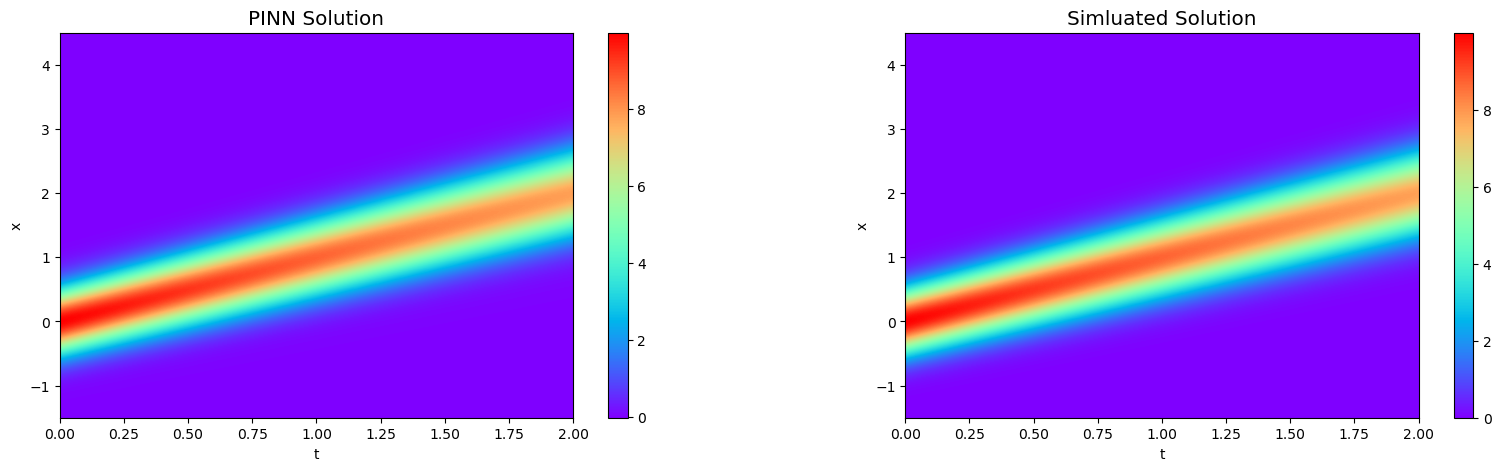

In [9]:
# plot & mse
fig = plt.figure(figsize=(20, 5))
u_viz = (u.reshape(201, 193)).T 
ext = [0 ,2, -1.5, 4.5]     # plot boundary  
ax1 = fig.add_subplot(1,2,1)
mesh =ax1.imshow(u_viz, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=.25); 
plt.colorbar(mesh) 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('PINN Solution', fontsize='x-large'); 

u_true = (batch_y.reshape(201, 193)).T 
ext = [0 ,2, -1.5, 4.5]     # plot boundary    
ax2 = fig.add_subplot(1,2,2)
mesh2 = ax2.imshow(u_true, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=.25); 
plt.colorbar(mesh2); 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('Simluated Solution', fontsize='x-large'); 

jnp.mean((u_viz - u_true)**2)

Write PINN prediction & ground truth to file

In [10]:
#np.save('linear_cma_60s', (u_viz, u_true))